# PIK3CA: Effects of Mutation on AKT2

<b> Standard imports for playing with and plotting data frames. </b>

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

<b> Import CPTAC data

In [14]:
import CPTAC

In [15]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and AKT2 proteome abundance

### Perform a t-test with mutated and non-mutated protein levels

In [16]:
protList = ['AKT2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for AKT2: 
Ttest_indResult(statistic=-4.475870221783481, pvalue=1.602813329063142e-05)


 ### We can now plot the data 

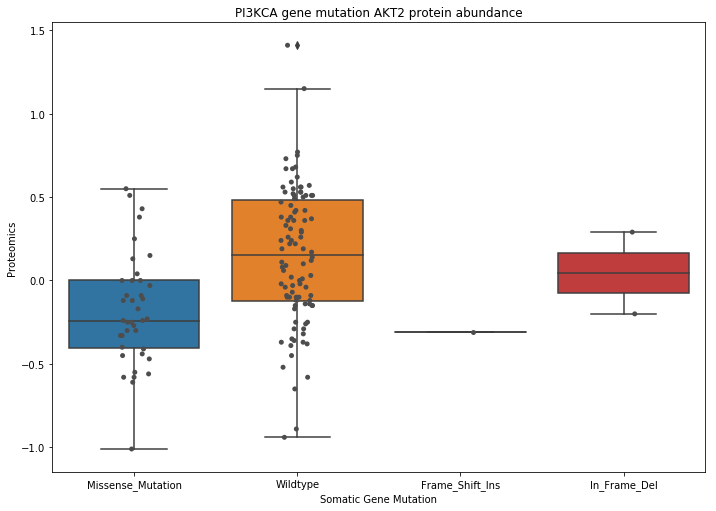

In [17]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='AKT2', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation AKT2 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='AKT2',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and AKT2 phosphoproteome abundance 

In [18]:
sites = phos.columns;
significantPhosResults = [];
totalSites = 0

phosProtList = ['AKT2']

for protein in phosProtList:
    matchesdf = phos.filter(regex=protein)
    totalSites += len(matchesdf.columns)

pcutoff = 0.05 / totalSites

    

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                if(ttest[1] <= pcutoff):
                    #significantResults.append(site)
                    print("Test for " + site + ": ")
                    print(ttest)  
                else:
                    print("Unsignificant results for " + site + ": ")
                    print(ttest)

Unsignificant results for AKT2-T451: 
Ttest_indResult(statistic=-0.5305719191973527, pvalue=0.5967385480615139)
Gene Patient_Type not found in phosphoproteomics data


AttributeError: 'NoneType' object has no attribute 'columns'

## PIK3CA mutation and AKT2 protein abundance (no control)

<b> Take out the conrol </b>

In [19]:
proteomics = proteomics[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [20]:
protList = ['AKT2']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'


sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
        else:
            print("Unsignificant result for " + protein + ":")
            print(ttest)

Unsignificant result for AKT2:
Ttest_indResult(statistic=-1.78488195820731, pvalue=0.07747228952217859)


# PI3KCA mutation and AKT2 phosphoproteome abundance (no control)

In [21]:
sites = phos.columns;
significantPhosResults = [];
totalSites = 0

for protein in phosProtList:
    matchesdf = phos.filter(regex=protein)
    totalSites += len(matchesdf.columns)

pcutoff = 0.05 / totalSites

    

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                if(ttest[1] <= pcutoff):
                    #significantResults.append(site)
                    print("Test for " + site + ": ")
                    print(ttest)            

Gene Patient_Type not found in phosphoproteomics data


AttributeError: 'NoneType' object has no attribute 'columns'